# Nolan

## Research question/interests

Overall, one of the biggest interests I have when it comes to our data set is in regards to the levels of gun violence and what different time periods they fit withing. More specifically, this interest is looking at what year from 2014 and 2020 had the highest levels of gun violence, as well as what month over this time period also had the highest levels of gun violence. Another thing that I want to look at is how possible outside factors may be in correlation with the data in the data set. 

For example, one of the things that I want to look at is if the season has any sort of correlation with the levels of gun violence that we find within each month, and I want to check if my hypothesis, being that there are higher levels of gun violence withing the spring/summer months, is true.

Another thing I want to look at is if there have been any massive events/occurrences that have happened during any of the years that are part of our data set, and see whether or not they played a significant role in gun violence. One example of this would be looking at the year of 2020, and seeing whether or not the COVID-19 pandemic played a significant role in the levels of gun violence in the United States.

# Milestone 3

## Task 1 - EDA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
df = pd.read_csv("../data/raw/US_Gun_Violence_Data.csv")
print(df)

      incident_id    incident_date         state  city_or_county  \
0         2015849      May 26 2021      Illinois         Chicago   
1         2015730      May 26 2021    California        San Jose   
2         2014343      May 24 2021      Michigan         Inkster   
3         2014381      May 24 2021          Ohio  West Jefferson   
4         2012971      May 23 2021      Illinois         Chicago   
...           ...              ...           ...             ...   
2925        95550  January 12 2014       Alabama      Huntsville   
2926        95146  January 11 2014   Mississippi         Jackson   
2927        94514   January 5 2014  Pennsylvania            Erie   
2928        92704   January 3 2014      New York          Queens   
2929        92194   January 1 2014      Virginia         Norfolk   

                                            address  killed  injured  
0                     7200 block of S Princeton Ave       0        4  
1                                 101 W Y

In [ ]:
df.shape

(2930, 7)

In [ ]:
df.head()

,incident_id,incident_date,state,city_or_county,address,killed,injured
0,2015849,May 26 2021,Illinois,Chicago,7200 block of S Princeton Ave,0,4
1,2015730,May 26 2021,California,San Jose,101 W Younger Ave,10,0
2,2014343,May 24 2021,Michigan,Inkster,27000 block of Rosewood St,2,2
3,2014381,May 24 2021,Ohio,West Jefferson,127 Jackson St,4,0
4,2012971,May 23 2021,Illinois,Chicago,3344 W Ohio St,0,4


In [ ]:
df.columns

Index(['incident_id', 'incident_date', 'state', 'city_or_county', 'address',
       'killed', 'injured'],
      dtype='object')

In [ ]:
df.nunique(axis=0)

incident_id       2930
incident_date     1571
state               48
city_or_county     861
address           2903
killed              19
injured             26
dtype: int64

In [ ]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,incident_id,killed,injured
count,2930.000000,2930.000000,2930.000000
mean,1099381.767918,1.072696,4.188055
std,587470.802438,2.156834,8.395836
min,92194.000000,0.000000,0.000000
25%,575898.750000,0.000000,3.000000
50%,1143329.500000,1.000000,4.000000
75%,1678961.750000,1.000000,5.000000
max,2015849.000000,59.000000,441.000000


In [ ]:
df_cleaned = df.copy().drop(['incident_id', 'address'], axis=1)
df_cleaned

,incident_date,state,city_or_county,killed,injured
0,May 26 2021,Illinois,Chicago,0,4
1,May 26 2021,California,San Jose,10,0
2,May 24 2021,Michigan,Inkster,2,2
3,May 24 2021,Ohio,West Jefferson,4,0
4,May 23 2021,Illinois,Chicago,0,4
...,...,...,...,...,...
2925,January 12 2014,Alabama,Huntsville,0,5
2926,January 11 2014,Mississippi,Jackson,0,4
2927,January 5 2014,Pennsylvania,Erie,1,3
2928,January 3 2014,New York,Queens,1,3


In [ ]:
df_cleaned = df_cleaned[df_cleaned['killed'].between(0, 15)]
df_cleaned = df_cleaned[df_cleaned['injured'].between(0, 20)]
df_cleaned.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,killed,injured
count,2921.000000,2921.000000
mean,1.007189,3.981171
std,1.455369,1.949356
min,0.000000,0.000000
25%,0.000000,3.000000
50%,1.000000,4.000000
75%,1.000000,5.000000
max,13.000000,19.000000


(-1.0, 26.0)

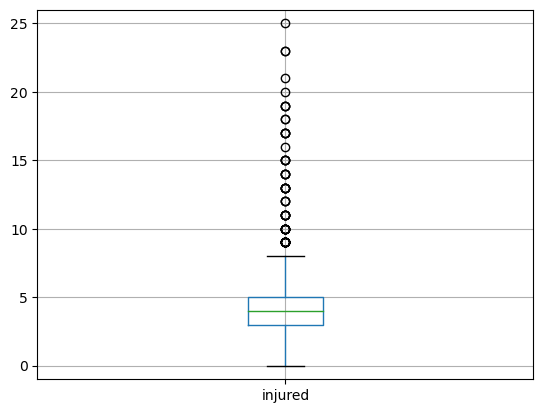

In [ ]:
df_cleaned.boxplot('injured')
plt.ylim(-1, 26)

## Meaning of the Above Box plot
- All of the different elements of the box plot gives us different statistical values that we can use to make a judgment about the data, with these different statistical values including things such as the mean, quartile ranges, and outliers
- From the above box plot, we can estimate that the mean for the number of people injured using the green line in the middle of the box on the box plot. With this, we can determine that the mean is somewhere in the range of 3.5-4. We can confirm this by looking at the values in one of the above functions that says the mean is 3.98 people injured
- We can also use the box plot to determine the range of where most of the data is. Using the lines on the ends of the box plot we can determine that the most of the cases have a number of people injured in the range from 0 to just over 7.5
- Finally, we can also look at the circles on the box plot to determine some of the outliers in the data, i.e. data that doesn't fall reasonably within the range of values that we have. On this graph, all of the outliers are are shown to be above the 75 percent quartile range, with the smallest outlier being around 9 people injured and the largest outlier being around 25 people injured

(-1.0, 14.0)

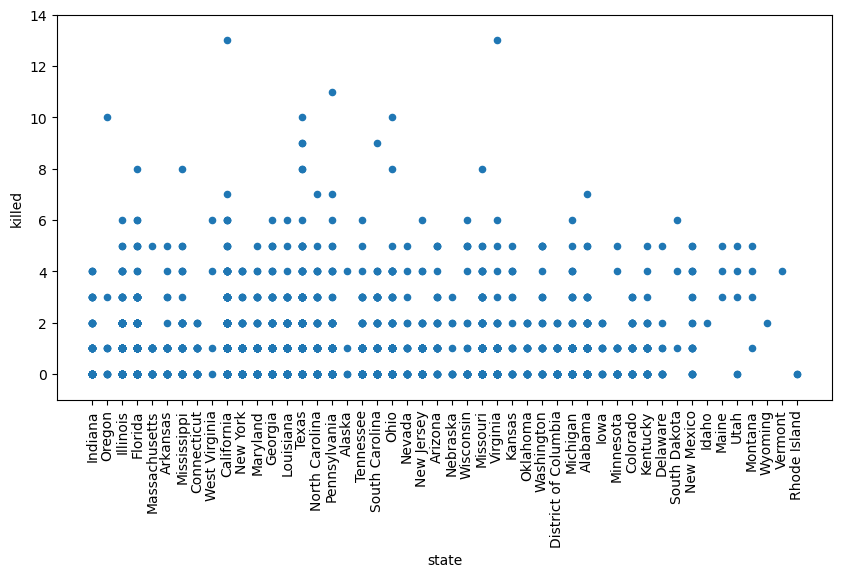

In [ ]:
df_cleaned.plot(kind='scatter', figsize=(10, 5), x='state', y='killed', rot=90)
plt.ylim(-1, 14)

## Meaning of the above Scatter Plot
- When using a scatter plot, we are able to see the relationship of the two quantities on the two axis, and each point on the graph represents 1 of the incidents that displays this correspondence. 
- In the case for the above scatter plot, the relationship that we are looking at is the relationship between the number of people killed in mass shootings in correspondence with the states that these shootings take place in
- As we can see, there are a lot of states that have somewhat similar levels of shootings, but even with this similarity we are able to determine which cases have more or less shootings based on the number of dots for each state. For example, we can conclude that during the time period that the data was collected, the states that had the lowest number of people killed as a result of mass shootings were Rhode Island, Idaho, and Vermont. 
- In contrast, we can also find the states that had the most people killed in mass shootings in the time period this data was collected. From looking at the points, it can be determined that the states that meet this criteria are California and Texas
#### IMPORTANT NOTE
- I believe that it is important to mention that even though we can make well formed educated guesses about the data from this scatter plot, these guesses are still going to be far from perfect without other sources of data
- One such reason for this is that this graph does not show the number of times a dot has been placed at a given location in the data. For example, if you were to look at Idaho on the scatter plot, it would appear that they only had one mass shooting resulting in 2 peoples deaths. However, there may be multiple different cases of mass shootings in Idaho where 2 people died, and this results in the dots for this data all being placed on the same spot, skewing the way that people perceive the graph
- Mainly for this reason, while I do think that this graph is good and provides us with valuable information, without the presence of other data as well, it is hard to actually make a reasonable assumption about the data. 

(-1.0, 20.0)

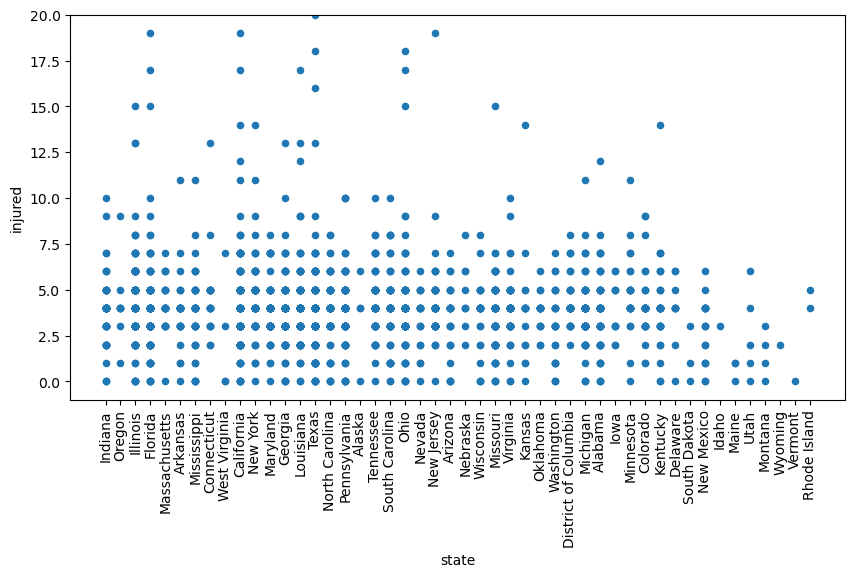

In [ ]:
df_cleaned.plot(kind='scatter', figsize=(10, 5), x='state', y='injured', rot=90)
plt.ylim(-1, 20)

## Meaning of the above Scatter Plot
- Just like the scatter plot earlier, this graph shows us the correlation between 2 quantities of our data set on the two axis. The difference this time is that the y axis now corresponds to the number of people killed rather than the number of people injured

## IMPORTANT NOTE
- Also just like the earlier scatter plot, even though we are able to make some educated guesses because of this scatter plot, the one scatter plot is far from perfect, and without other information accompanying this scatter plot, we are unable to make reasonable assumptions about the data

## Better Visualizations to take place of the above 2 Scatterplots

### Killed in each State

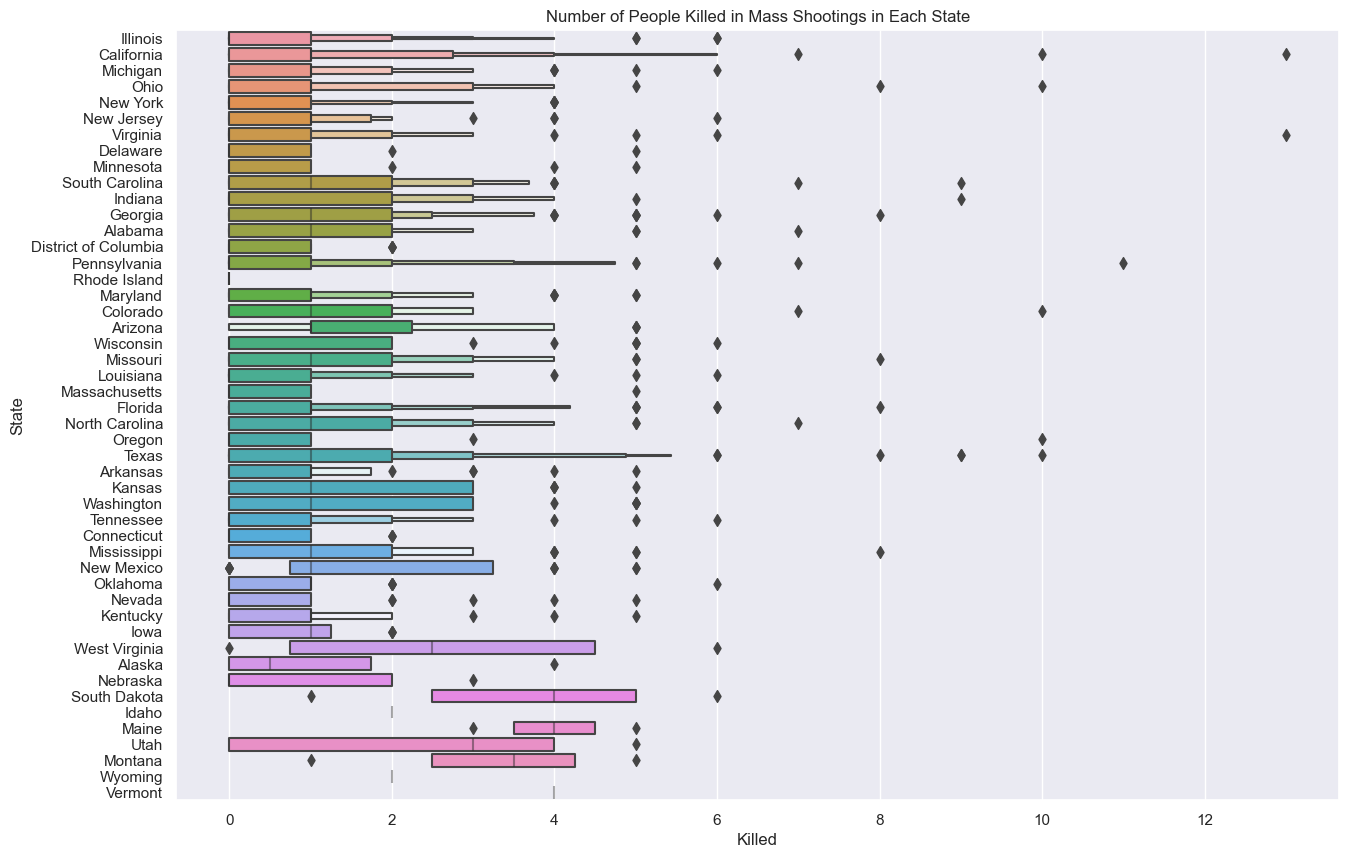

In [ ]:
df_cleaned_kplot = sns.boxenplot(data=df_cleaned, y='state', x='killed')
df_cleaned_kplot.set(title='Number of People Killed in Mass Shootings in Each State', xlabel='Killed', ylabel='State')
sns.set(rc={'figure.figsize':(15,10)})

### Injured in each State

[Text(0.5, 1.0, 'Number of People Injured in Mass Shootings in Each State'),
 Text(0.5, 0, 'Injured'),
 Text(0, 0.5, 'State')]

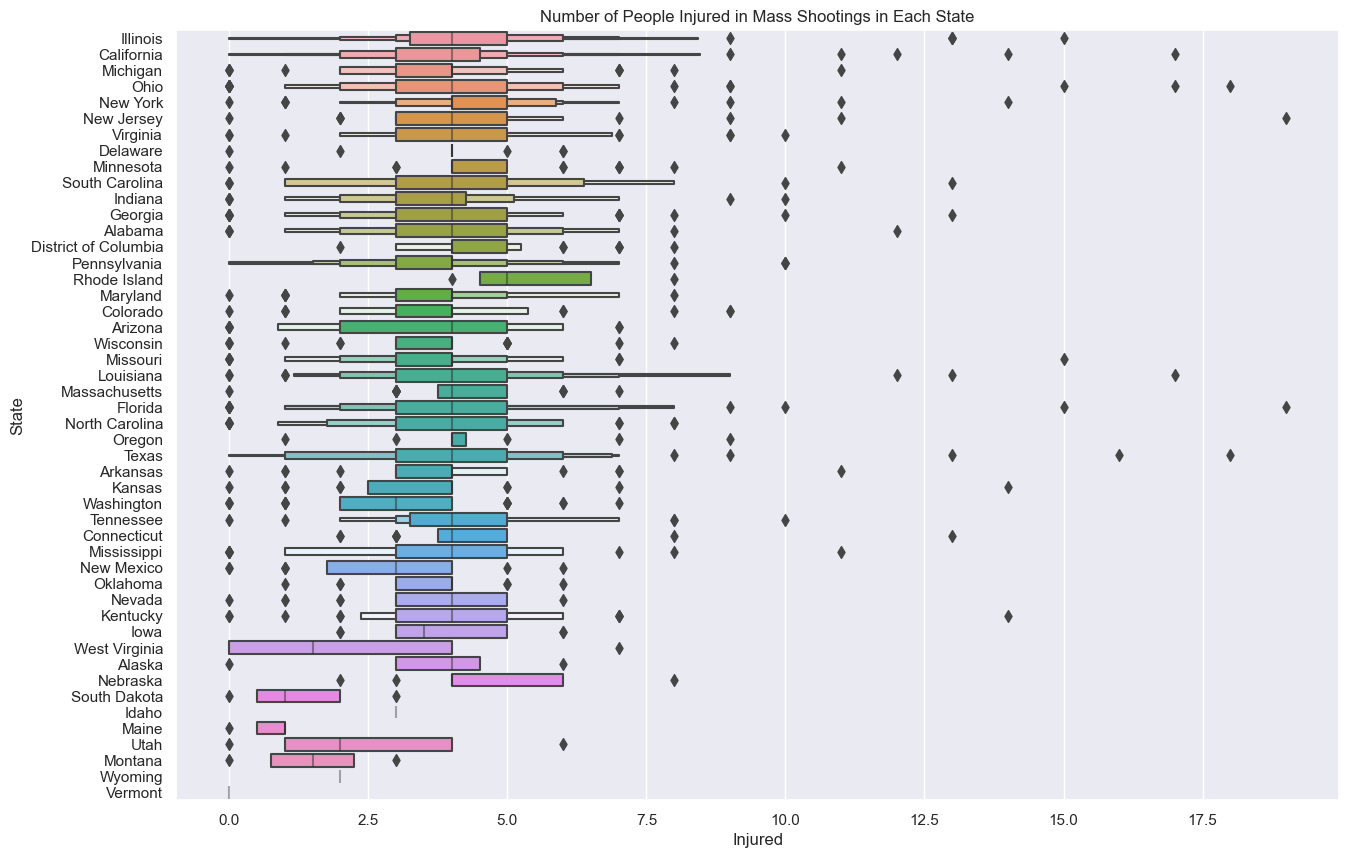

In [ ]:
df_cleaned_iplot = sns.boxenplot(data=df_cleaned, y='state', x='injured')
df_cleaned_iplot.set(title='Number of People Injured in Mass Shootings in Each State', xlabel='Injured', ylabel='State')

### Notes
- When looking at the above boxen plots, we are able to get a much better idea as to the numbers the shootings entail
- One of the main things that we can infer from the data before these plots is that the number of shootings is a continuous type of data rather than a discrete type and as a result, a graph that is better at displaying continuous types of data is much better for representing what each graph is trying to tell
- Another result of these new graphs is also the fact that they are a bit easier to interpret the meaning of them, even if you have no idea what each part of the graphs mean. It is much easier to understand something that looks close to what people are normally familiar with (in this case, the thing most people would probably be familiar with are bar graphs) which leads to better audience interpretation

## Task 2 - Analysis Pipeline

### Step 1 - Load the Data
- already complete

In [ ]:
df

,incident_id,incident_date,state,city_or_county,address,killed,injured
0,2015849,May 26 2021,Illinois,Chicago,7200 block of S Princeton Ave,0,4
1,2015730,May 26 2021,California,San Jose,101 W Younger Ave,10,0
2,2014343,May 24 2021,Michigan,Inkster,27000 block of Rosewood St,2,2
3,2014381,May 24 2021,Ohio,West Jefferson,127 Jackson St,4,0
4,2012971,May 23 2021,Illinois,Chicago,3344 W Ohio St,0,4
...,...,...,...,...,...,...,...
2925,95550,January 12 2014,Alabama,Huntsville,University Drive,0,5
2926,95146,January 11 2014,Mississippi,Jackson,3430 W. Capitol Street,0,4
2927,94514,January 5 2014,Pennsylvania,Erie,829 Parade St,1,3
2928,92704,January 3 2014,New York,Queens,Farmers Boulevard and 133rd Avenue,1,3


### Step 2/3 - Clean/Process the Data

- removing of columns not being used

In [ ]:
df = df.drop(['incident_id', 'address', 'city_or_county'], axis=1)
df

,incident_date,state,killed,injured
0,May 26 2021,Illinois,0,4
1,May 26 2021,California,10,0
2,May 24 2021,Michigan,2,2
3,May 24 2021,Ohio,4,0
4,May 23 2021,Illinois,0,4
...,...,...,...,...
2925,January 12 2014,Alabama,0,5
2926,January 11 2014,Mississippi,0,4
2927,January 5 2014,Pennsylvania,1,3
2928,January 3 2014,New York,1,3


- splitting incident_date and creating Month and Year columns
- the actual day of the month is not something that is important to us, and actually acts as an unnecessary distraction, which is why the days aren't getting their own column as well

In [ ]:
df['Month'] = df['incident_date'].str.split().str[0];
df['Year'] = df['incident_date'].str.split().str[2];
df

,incident_date,state,killed,injured,Month,Year
0,May 26 2021,Illinois,0,4,May,2021
1,May 26 2021,California,10,0,May,2021
2,May 24 2021,Michigan,2,2,May,2021
3,May 24 2021,Ohio,4,0,May,2021
4,May 23 2021,Illinois,0,4,May,2021
...,...,...,...,...,...,...
2925,January 12 2014,Alabama,0,5,January,2014
2926,January 11 2014,Mississippi,0,4,January,2014
2927,January 5 2014,Pennsylvania,1,3,January,2014
2928,January 3 2014,New York,1,3,January,2014


- dropping incident date row as its no longer needed

In [ ]:
df = df.drop(['incident_date'], axis=1)
df

,state,killed,injured,Month,Year
0,Illinois,0,4,May,2021
1,California,10,0,May,2021
2,Michigan,2,2,May,2021
3,Ohio,4,0,May,2021
4,Illinois,0,4,May,2021
...,...,...,...,...,...
2925,Alabama,0,5,January,2014
2926,Mississippi,0,4,January,2014
2927,Pennsylvania,1,3,January,2014
2928,New York,1,3,January,2014


- changing year column to int value and removing rows where the year is 2021
- we are removing the data from the year 2021 as we do not have data for the full year. If we were to include the data, it could skew the results from every other full year, making the data less reliable to look at

In [ ]:
df = df.astype({'Year' : 'int64'})
print(df.dtypes)
df = df.loc[df['Year'] <= 2020]
df

state      object
killed      int64
injured     int64
Month      object
Year        int64
dtype: object


,state,killed,injured,Month,Year
232,Indiana,1,3,December,2020
233,Oregon,0,4,December,2020
234,Illinois,3,3,December,2020
235,Florida,2,2,December,2020
236,Massachusetts,1,5,December,2020
...,...,...,...,...,...
2925,Alabama,0,5,January,2014
2926,Mississippi,0,4,January,2014
2927,Pennsylvania,1,3,January,2014
2928,New York,1,3,January,2014


### Step 4 - Wrangle the Data
- there is not much left to do with wrangling the data
- we are not merging this data set with another data set for our analysis, nor do we need to restructure the data set
- as such, there is nothing to do for step 4
- and with this, finished Task 2

## Task 3

### Step 1

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("../data/raw/US_Gun_Violence_Data.csv")

df = (
        pd.DataFrame(data=data)
        .drop(['incident_id', 'address', 'city_or_county'], axis=1)
        .assign(month=lambda x : x.incident_date.str.split().str[0])
        .assign(year=lambda x : x.incident_date.str.split().str[2])
        .drop(['incident_date'], axis=1)
        .astype({'year': 'int64'})
        .loc[lambda x : x['year'] <= 2020]
)

df

,state,killed,injured,month,year
232,Indiana,1,3,December,2020
233,Oregon,0,4,December,2020
234,Illinois,3,3,December,2020
235,Florida,2,2,December,2020
236,Massachusetts,1,5,December,2020
...,...,...,...,...,...
2925,Alabama,0,5,January,2014
2926,Mississippi,0,4,January,2014
2927,Pennsylvania,1,3,January,2014
2928,New York,1,3,January,2014


### Step 2

In [ ]:
import pandas as pd
import numpy as np

def load_and_process(url_or_path_to_csv_file):
    df = (
        pd.DataFrame(data=pd.read_csv(url_or_path_to_csv_file))
        .drop(['incident_id', 'address', 'city_or_county'], axis=1)
        .assign(month=lambda x : x.incident_date.str.split().str[0])
        .assign(year=lambda x : x.incident_date.str.split().str[2])
        .drop(['incident_date'], axis=1)
        .astype({'year': 'int64'})
        .loc[lambda x : x['year'] <= 2020]
    )

    return df;

df = load_and_process("../data/raw/US_Gun_Violence_Data.csv")
df

,state,killed,injured,month,year
232,Indiana,1,3,December,2020
233,Oregon,0,4,December,2020
234,Illinois,3,3,December,2020
235,Florida,2,2,December,2020
236,Massachusetts,1,5,December,2020
...,...,...,...,...,...
2925,Alabama,0,5,January,2014
2926,Mississippi,0,4,January,2014
2927,Pennsylvania,1,3,January,2014
2928,New York,1,3,January,2014


### Step 3

In [ ]:
from project_functions2 import load_and_process
df = load_and_process("../data/raw/US_Gun_Violence_Data.csv")
df

,state,killed,injured,month,year
232,Indiana,1,3,December,2020
233,Oregon,0,4,December,2020
234,Illinois,3,3,December,2020
235,Florida,2,2,December,2020
236,Massachusetts,1,5,December,2020
...,...,...,...,...,...
2925,Alabama,0,5,January,2014
2926,Mississippi,0,4,January,2014
2927,Pennsylvania,1,3,January,2014
2928,New York,1,3,January,2014


### Task 4

In [ ]:
# Loading in new dataset to work with in just task 4
from project_functions2 import load_and_process
df_landp = load_and_process("../data/raw/US_Gun_Violence_Data.csv")
df_landp

,state,killed,injured,month,year
232,Indiana,1,3,December,2020
233,Oregon,0,4,December,2020
234,Illinois,3,3,December,2020
235,Florida,2,2,December,2020
236,Massachusetts,1,5,December,2020
...,...,...,...,...,...
2925,Alabama,0,5,January,2014
2926,Mississippi,0,4,January,2014
2927,Pennsylvania,1,3,January,2014
2928,New York,1,3,January,2014


In [ ]:
# reindex of df_landp
df_idx = df_landp.reindex(['state','killed','injured','month','year'], axis=1)

## Research Topic 1: Correlation between # of Shootings and Month/Time of Year

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'December'),
  Text(1, 0, 'November'),
  Text(2, 0, 'October'),
  Text(3, 0, 'September'),
  Text(4, 0, 'August'),
  Text(5, 0, 'July'),
  Text(6, 0, 'June'),
  Text(7, 0, 'May'),
  Text(8, 0, 'April'),
  Text(9, 0, 'March'),
  Text(10, 0, 'February'),
  Text(11, 0, 'January')])

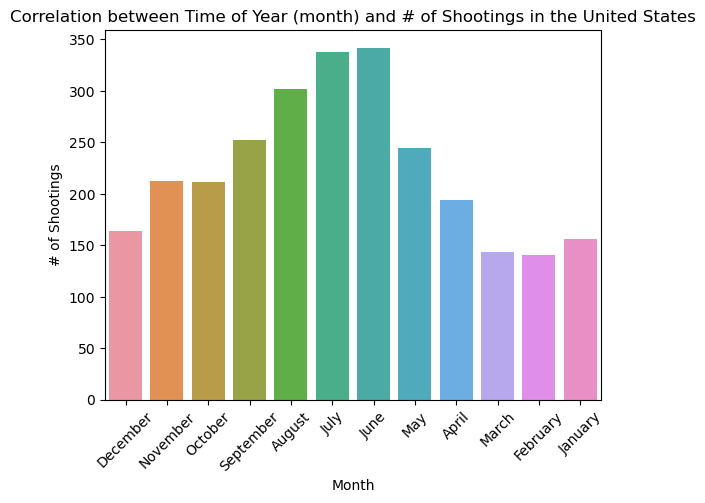

In [ ]:
df_plot = sns.countplot(data=df_idx, x='month')
df_plot.set(title="Correlation between Time of Year (month) and # of Shootings in the United States", xlabel="Month", ylabel="# of Shootings")
plt.xticks(rotation=45)

In the above graph, we are able to see that there is indeed a correlation between the total number of shootings with the month of the year. From the graph, the information presented tells us that we in the time frame from 2014 to 2020, the months of June, July, and August have the highest number of shootings. With this information, we can also make the assumption that because these are the 3 main summer months of the year, mass shootings are more likely too occur in warmer temperatures. There can be a number of outside reasons for this, such as the summer months providing more suitable conditions for mass shootings to occur, but without other data to go along with this graph, it is impossible to really say anything other that higher levels of gun violence are more prevalent during the warmer months of the year. 

## Note
One thing that I would like to mention is that while the above graph shows the general curve of what time shootings are most often to occur per year, this is not something is likely will not hold true for every single state. This is due to different locations in the states varying in how drastically their temperatures change throughout the year. For example, the states of Texas and Arizona are fairly warm throughout the entire year, meaning that we could expect that graphs showing the levels of gun violence could be more even or more variable as the restriction of the weather affecting conditions is much less prevalent.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'December'),
  Text(1, 0, 'November'),
  Text(2, 0, 'October'),
  Text(3, 0, 'September'),
  Text(4, 0, 'August'),
  Text(5, 0, 'July'),
  Text(6, 0, 'June'),
  Text(7, 0, 'May'),
  Text(8, 0, 'April'),
  Text(9, 0, 'March'),
  Text(10, 0, 'February'),
  Text(11, 0, 'January')])

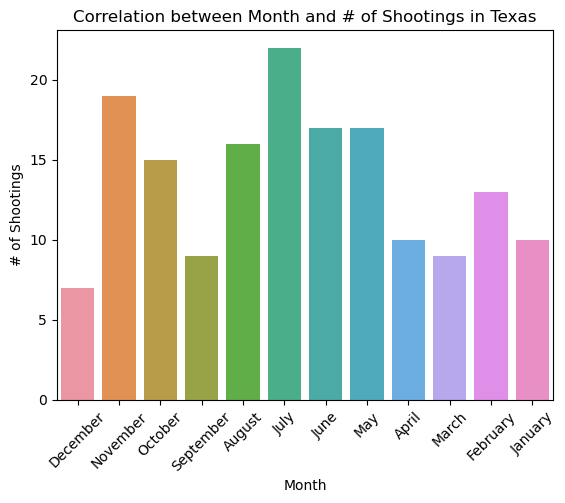

In [ ]:
df_tex = df_idx.loc[lambda x : x['state']=='Texas']
df_tex_plot = sns.countplot(data=df_tex, x='month')
df_tex_plot.set(title="Correlation between Month and # of Shootings in Texas", xlabel='Month', ylabel='# of Shootings')
df_tex_plot
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'November'),
  Text(1, 0, 'October'),
  Text(2, 0, 'July'),
  Text(3, 0, 'June'),
  Text(4, 0, 'May'),
  Text(5, 0, 'April'),
  Text(6, 0, 'March'),
  Text(7, 0, 'February'),
  Text(8, 0, 'January')])

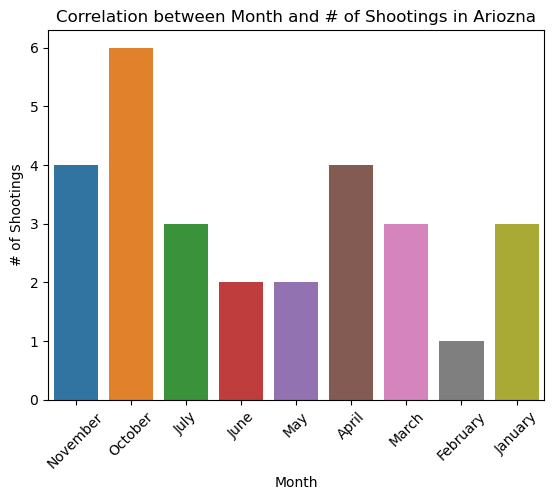

In [ ]:
df_ariz = df_idx.loc[lambda x : x['state']=='Arizona']
df_ariz_plot = sns.countplot(data=df_ariz, x='month', order=['November','October','July','June','May','April','March','February','January'])
df_ariz_plot.set(title="Correlation between Month and # of Shootings in Ariozna", xlabel='Month', ylabel='# of Shootings')
plt.xticks(rotation=45)

As we can see from the above two graphs, the metric of "The summer months result in more mass shootings" is something that does not hold true for every state. Both Texas and Arizona, which are some of the warmest states year round, show that there is more variation in the level of gun violence from month to month.

But what about a state that has more fluctuation during the seasons, such as New York or ?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'December'),
  Text(1, 0, 'November'),
  Text(2, 0, 'October'),
  Text(3, 0, 'September'),
  Text(4, 0, 'August'),
  Text(5, 0, 'July'),
  Text(6, 0, 'June'),
  Text(7, 0, 'April'),
  Text(8, 0, 'January'),
  Text(9, 0, 'February'),
  Text(10, 0, 'May'),
  Text(11, 0, 'March')])

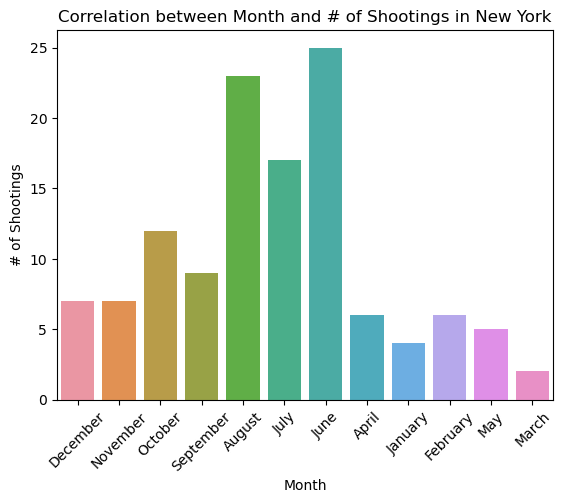

In [ ]:
df_ny = df_idx.loc[lambda x : x['state']=="New York"]
df_ny_plot = sns.countplot(data=df_ny, x='month')
df_ny_plot.set(title='Correlation between Month and # of Shootings in New York', xlabel='Month', ylabel='# of Shootings')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'December'),
  Text(1, 0, 'November'),
  Text(2, 0, 'October'),
  Text(3, 0, 'September'),
  Text(4, 0, 'August'),
  Text(5, 0, 'June'),
  Text(6, 0, 'May'),
  Text(7, 0, 'April'),
  Text(8, 0, 'January')])

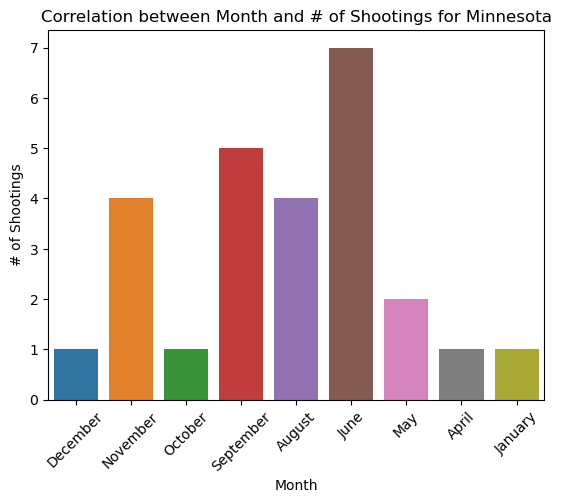

In [ ]:
df_minne = df_idx.loc[lambda x : x['state']=='Minnesota']
df_minne_plot = sns.countplot(data=df_minne, x='month', order=['December','November','October','September','August','June','May','April','January'])
df_minne_plot.set(title="Correlation between Month and # of Shootings for Minnesota", xlabel='Month', ylabel='# of Shootings')
plt.xticks(rotation=45)

When looking at different states that have much greater variation in weather throughout the year, it generally holds true that the warmer, summer months have higher levels of gun violence when compared to the colder winter months

## Conclusion for Months
- for the United States as a whole, in general we are able to see that there is a curve to the data showing that there is a tendency for mass shootings to happen in the warmer months of the year
- however, this is something that does not hold true for every state in the US, as the states that are warmer year round tend to follow this curve less than the states that have a greater variety in weather throughout the year. 

## Reaseerch Topic 2: Correlation between Year and # of Shootings

[Text(0.5, 1.0, 'Correlation between Year and # of Shootings in the United States'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, '# of Shootings')]

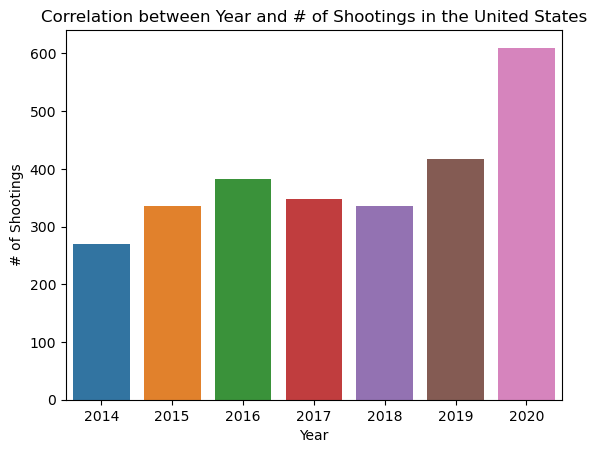

In [ ]:
df_year_plot = sns.countplot(data=df_idx, x='year')
df_year_plot.set(title="Correlation between Year and # of Shootings in the United States", xlabel="Year", ylabel="# of Shootings")

As we an see from the graph above, in general we can view a trend that as each year passes there are more mass shootings that occur. While yes, when you look at the graph, the years 2017 and 2018 are lowers than 2016, they are still around the same as 2015 and higher than 2014, so the trend that there are higher levels of gun violence with each passing year holds true.

In general, we can also make the assumption that big events that have taken place within these years have played little to no role in the trend of gun violence. For example, 2020 was the year in which COVID-19 became a world wide pandemic, with the United States being one of the hardest hit countries in the world. Because of this, one would logically think that due to people being inside and quarantining from each other, you would see a drop in the levels of gun violence, but the data shows that this is in fact the opposite. Paired with the fact that there is a general trend of the number of shootings increasing with each passing year, it is safe to assume that there are little outside factors that play a role in the number of shootings every year (in the years of 2014 to 2020 that we are dealing with)

## Conclusion for Years:
- in general, we can witness a trend in which gun violence really only increases as the years go on
- we can also reasonably assume that big world events play little role in the way that the number of shootings change per year, as the graph continues to follow the trend of in violence regardless of what has happened within each year

## Exporting Processed Data

In [ ]:
from project_functions2 import load_and_process
df_processed = load_and_process("../data/raw/US_Gun_Violence_Data.csv")
df_processed.to_csv("../data/processed/Clean_Gun_Nolan.csv")